In [2]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import DenseNet121
from keras.models import Model
from keras.layers import GlobalAveragePooling2D


In [3]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


In [4]:
# Loading the dataset and preparing it for training
train_path = '../dataset_organized/train/'
test_path = '../dataset_organized/test/'
val_path = '../dataset_organized/validation/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)
X_val, y_val = load_images(val_path)

classes_names = np.unique(y_train)

# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

# One hot encoding the target variable
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)
y_val = to_categorical(y_val_encoded)

# Splitting the training set into training and validation set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=0)

# Normalizing the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

100%|██████████| 17/17 [00:00<00:00, 1459.49it/s]


# Adam momentum

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 156, 156,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 38, 38,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 38, 38,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 38, 38,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 38, 38,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 38, 38,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 38, 38,    │     12,288 │ conv2_block2_0_r

 Total params: 7,169,478 (27.35 MB)

 Trainable params: 131,974 (515.52 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 55s 832ms/step - accuracy: 0.3718 - loss: 1.9225 - val_accuracy: 0.7043 - val_loss: 0.9036
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 741ms/step - accuracy: 0.6520 - loss: 0.9906 - val_accuracy: 0.7165 - val_loss: 0.7629
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 737ms/step - accuracy: 0.7153 - loss: 0.8050 - val_accuracy: 0.7561 - val_loss: 0.7089
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 734ms/step - accuracy: 0.7628 - loss: 0.6723 - val_accuracy: 0.7744 - val_loss: 0.6693
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 738ms/step - accuracy: 0.7991 - loss: 0.5473 - val_accuracy: 0.7500 - val_loss: 0.6640
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 729ms/step - accuracy: 0.8334 - loss: 0.4670 - val_accuracy: 0.7683 - val_loss: 0.6487
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 720ms/step - accuracy: 0.8387 - loss: 0.4362 - val_accuracy: 0.7683 - val_loss: 0.6325
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 732ms/step - accuracy: 0.8513 - loss: 0.4350 - val_accu

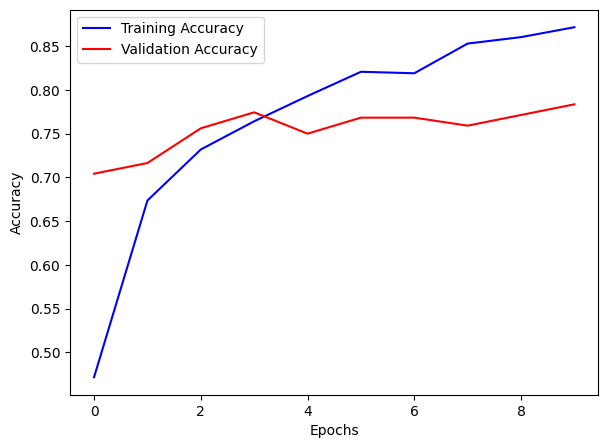

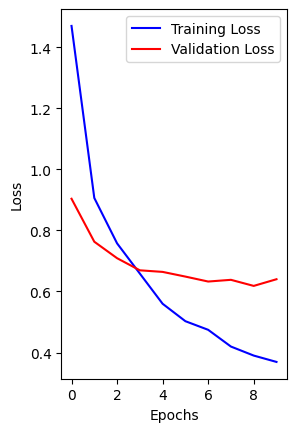

Training Accuracy: 0.8716063499450684
Validation Accuracy: 0.7835366129875183
Training Loss: 0.3692389130592346
Validation Loss: 0.6400343179702759


In [5]:
# Building the model

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# saving the model
model.save('densenet121_model.h5')
plt.figure(figsize=(15, 5))

# Plotting the training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with L2 Regularization


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 795ms/step - accuracy: 0.4631 - loss: 1.6283 - val_accuracy: 0.6890 - val_loss: 0.9111
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 738ms/step - accuracy: 0.7911 - loss: 0.7084 - val_accuracy: 0.7622 - val_loss: 0.7763
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 725ms/step - accuracy: 0.8608 - loss: 0.5317 - val_accuracy: 0.7652 - val_loss: 0.7488
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 725ms/step - accuracy: 0.9101 - loss: 0.4024 - val_accuracy: 0.7713 - val_loss: 0.7505
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 717ms/step - accuracy: 0.9373 - loss: 0.3402 - val_accuracy: 0.7774 - val_loss: 0.7650
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 715ms/step - accuracy: 0.9654 - loss: 0.2891 - val_accuracy: 0.7866 - val_loss: 0.7453
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 712ms/step - accuracy: 0.9731 - loss: 0.2377 - val_accuracy: 0.7896 - val_loss: 0.7506
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 715ms/step - accuracy: 0.9895 - loss: 0.2048 - val_accu

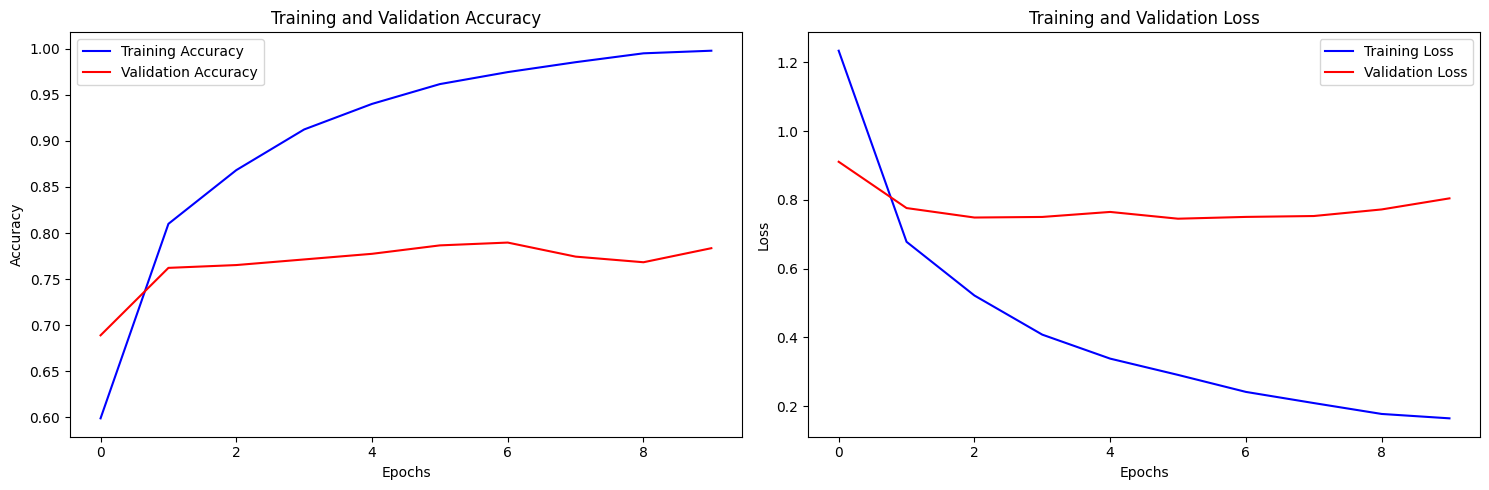

Training Accuracy: 0.9977375268936157
Validation Accuracy: 0.7835366129875183
Training Loss: 0.16428866982460022
Validation Loss: 0.8045536279678345


In [6]:

from keras.regularizers import l2

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
predictions = Dense(6, activation='softmax')(x)
model_l2 = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_l2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
model_l2.save('densenet_model_l2.h5')


# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with L1 Regularization


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 788ms/step - accuracy: 0.4986 - loss: 5.3514 - val_accuracy: 0.7134 - val_loss: 3.0360
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 726ms/step - accuracy: 0.8277 - loss: 2.5741 - val_accuracy: 0.7317 - val_loss: 2.4112
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 697ms/step - accuracy: 0.8576 - loss: 2.0248 - val_accuracy: 0.7439 - val_loss: 2.0991
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 665ms/step - accuracy: 0.8866 - loss: 1.6929 - val_accuracy: 0.7622 - val_loss: 1.8989
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 669ms/step - accuracy: 0.8826 - loss: 1.4903 - val_accuracy: 0.7561 - val_loss: 1.7070
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 667ms/step - accuracy: 0.9283 - loss: 1.2595 - val_accuracy: 0.7805 - val_loss: 1.5719
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 662ms/step - accuracy: 0.9502 - loss: 1.0946 - val_accuracy: 0.7409 - val_loss: 1.5339
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 671ms/step - accuracy: 0.9430 - loss: 0.9993 - val_accu

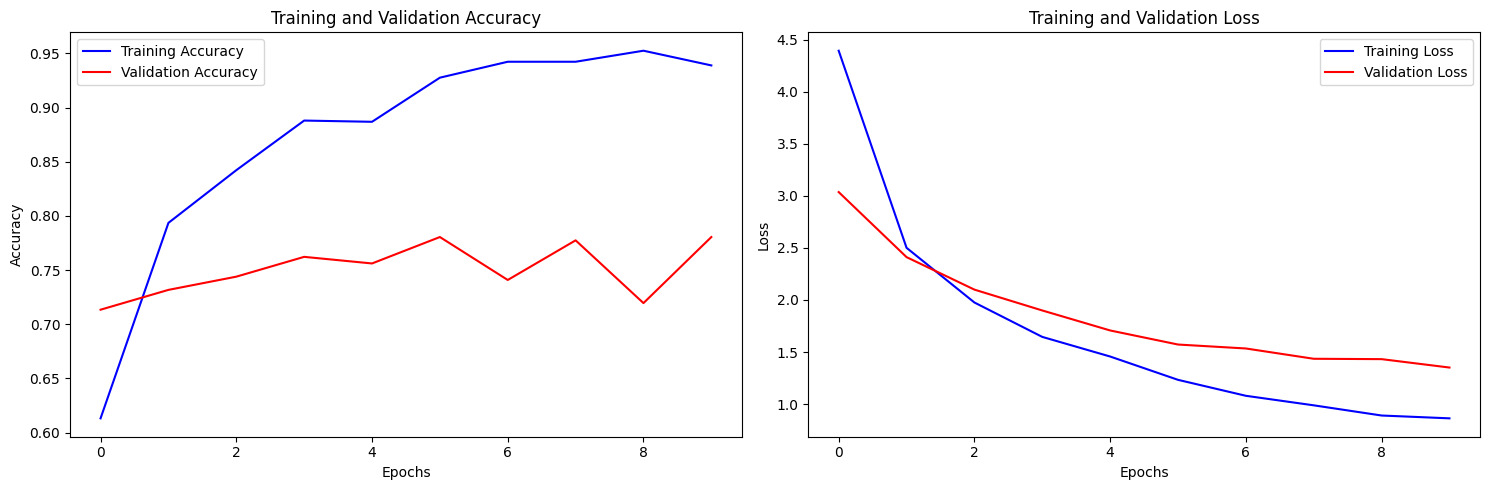

Training Accuracy: 0.9389140009880066
Validation Accuracy: 0.7804877758026123
Training Loss: 0.863045871257782
Validation Loss: 1.3508824110031128


In [7]:

from keras.regularizers import l1

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l1(0.001))(x)
predictions = Dense(6, activation='softmax')(x)
model_l1 = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_l1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_l1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
model_l1.save('densenet_model_l1.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with Dropout Only (baseline already similar)


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 742ms/step - accuracy: 0.3851 - loss: 1.8661 - val_accuracy: 0.6494 - val_loss: 0.9114
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 669ms/step - accuracy: 0.6315 - loss: 0.9591 - val_accuracy: 0.7256 - val_loss: 0.7789
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 669ms/step - accuracy: 0.7148 - loss: 0.8264 - val_accuracy: 0.7409 - val_loss: 0.6904
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 674ms/step - accuracy: 0.7787 - loss: 0.5904 - val_accuracy: 0.7652 - val_loss: 0.6429
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 673ms/step - accuracy: 0.7946 - loss: 0.5954 - val_accuracy: 0.7439 - val_loss: 0.6530
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 669ms/step - accuracy: 0.8157 - loss: 0.4917 - val_accuracy: 0.7622 - val_loss: 0.6570
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 673ms/step - accuracy: 0.8370 - loss: 0.4651 - val_accuracy: 0.7805 - val_loss: 0.6230
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 669ms/step - accuracy: 0.8559 - loss: 0.4105 - val_accu

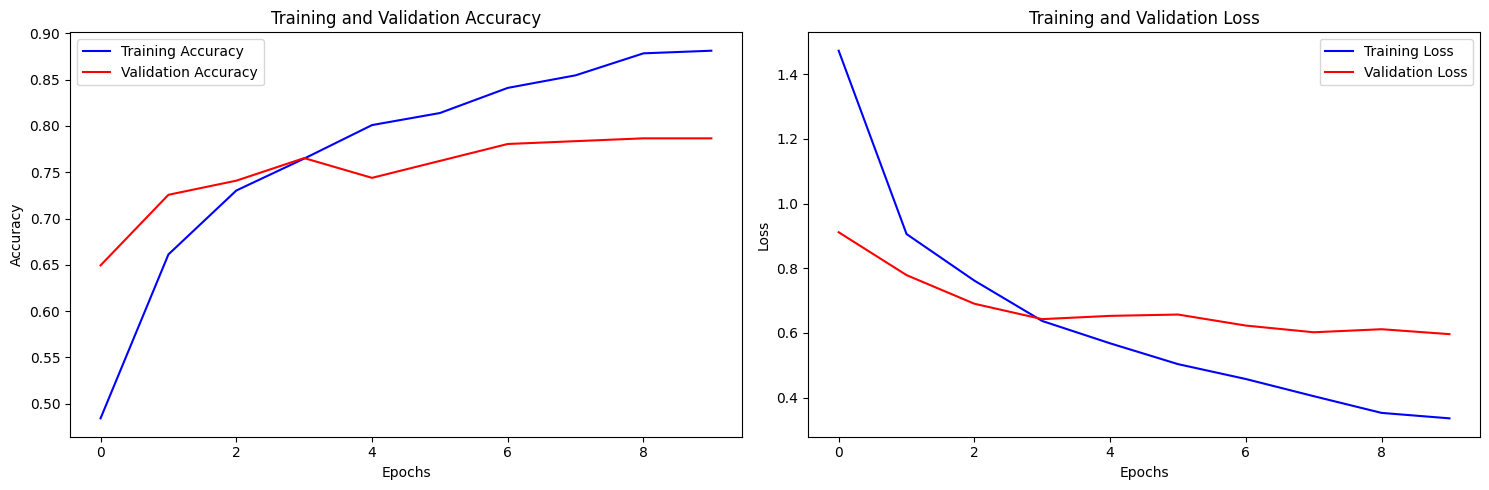

Training Accuracy: 0.8812217116355896
Validation Accuracy: 0.7865853905677795
Training Loss: 0.336180716753006
Validation Loss: 0.5964526534080505


In [8]:

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)
model_dropout = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_dropout.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
model_dropout.save('densenet_model_dropout.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with EarlyStopping Only


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 48s 731ms/step - accuracy: 0.4762 - loss: 1.4457 - val_accuracy: 0.7409 - val_loss: 0.7937
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 671ms/step - accuracy: 0.7811 - loss: 0.6285 - val_accuracy: 0.7591 - val_loss: 0.7350
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 666ms/step - accuracy: 0.8519 - loss: 0.4194 - val_accuracy: 0.7378 - val_loss: 0.7118
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 665ms/step - accuracy: 0.8938 - loss: 0.3253 - val_accuracy: 0.7622 - val_loss: 0.6877
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 663ms/step - accuracy: 0.9464 - loss: 0.2297 - val_accuracy: 0.7683 - val_loss: 0.7032
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 666ms/step - accuracy: 0.9587 - loss: 0.1768 - val_accuracy: 0.7683 - val_loss: 0.7296
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 629ms/step - accuracy: 0.9844 - loss: 0.1287 - val_accuracy: 0.7835 - val_loss: 0.7248


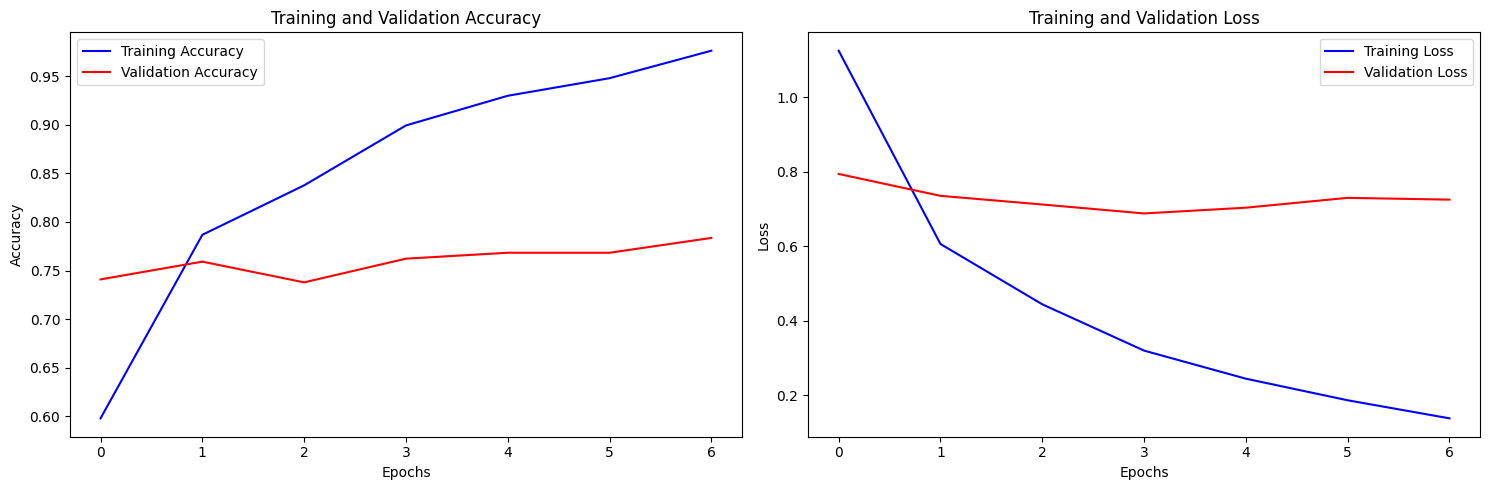

Training Accuracy: 0.976244330406189
Validation Accuracy: 0.7835366129875183
Training Loss: 0.138068288564682
Validation Loss: 0.7248212099075317


In [9]:

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)
model_es = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_es.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_es.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])
model_es.save('densenet_model_es.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Model with Dropout + EarlyStopping


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 815ms/step - accuracy: 0.3612 - loss: 1.8907 - val_accuracy: 0.6494 - val_loss: 0.9338
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 750ms/step - accuracy: 0.6433 - loss: 0.9459 - val_accuracy: 0.6982 - val_loss: 0.7719
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 732ms/step - accuracy: 0.7067 - loss: 0.7886 - val_accuracy: 0.7165 - val_loss: 0.7242
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 731ms/step - accuracy: 0.7758 - loss: 0.6379 - val_accuracy: 0.7713 - val_loss: 0.6845
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 720ms/step - accuracy: 0.7901 - loss: 0.5948 - val_accuracy: 0.7591 - val_loss: 0.6595
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 720ms/step - accuracy: 0.8242 - loss: 0.5120 - val_accuracy: 0.7439 - val_loss: 0.6792
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 720ms/step - accuracy: 0.8432 - loss: 0.4391 - val_accuracy: 0.7927 - val_loss: 0.6129
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 723ms/step - accuracy: 0.8440 - loss: 0.4294 - val_accu

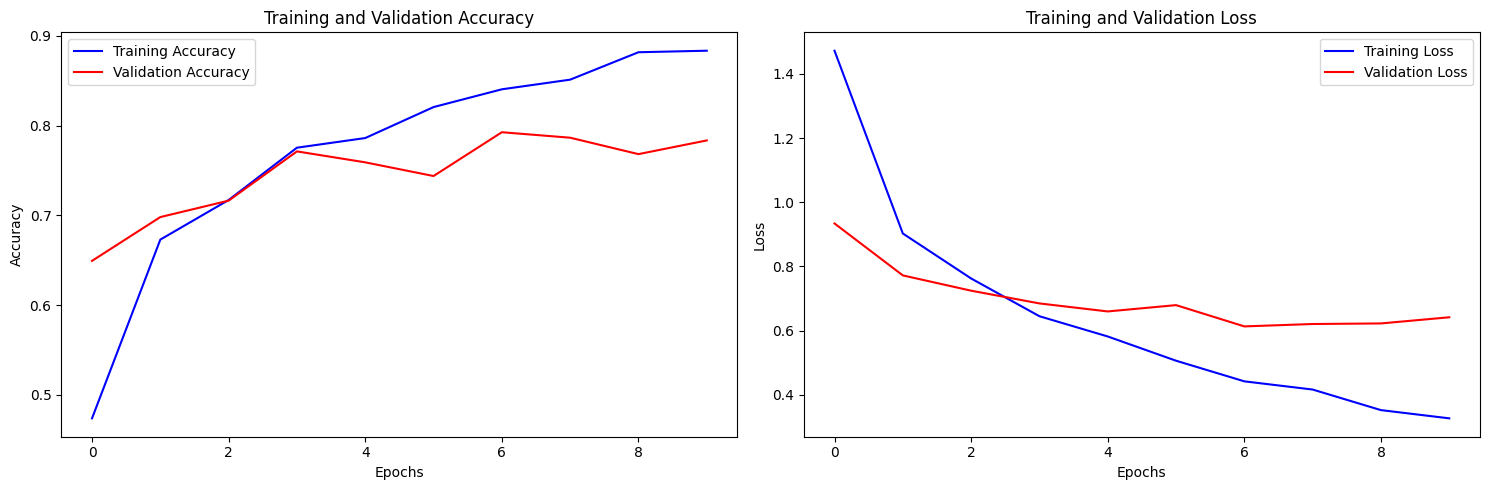

Training Accuracy: 0.8834841847419739
Validation Accuracy: 0.7835366129875183
Training Loss: 0.32628628611564636
Validation Loss: 0.6413346529006958


In [10]:

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)
model_de = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_de.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_de.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])
model_de.save('densenet_model_de.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Comparing with test accuracy

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    accuracy_score, roc_curve, auc,
    classification_report, confusion_matrix
)

def evaluate_model(predictions, y_true, class_names):
    # F1 Score
    f1 = f1_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("F1 Score: ", f1)

    # Precision
    precision = precision_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("Precision: ", precision)

    # Recall
    recall = recall_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("Recall: ", recall)

    # Accuracy
    accuracy = accuracy_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1))
    print("Accuracy: ", accuracy)

    # Compute ROC curve and AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1))

    # Plot ROC + Confusion Matrix in one figure
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # ROC Curve Plot
    for i in range(len(class_names)):
        axes[0].plot(fpr[i], tpr[i], label=class_names[i] + f' (AUC = {roc_auc[i]:.2f})')
    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].set_title('ROC Curve')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].legend()

    # Confusion Matrix Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=axes[1])
    axes[1].set_title('Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # Classification Report
    print(classification_report(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), target_names=class_names))



Loading the model



Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 801ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 621ms/step - accuracy: 0.8849 - loss: 0.3973
Test Loss: 0.5693658590316772
Test Accuracy: 0.8236659169197083
F1 Score:  0.8174627077988575
Precision:  0.8349684281556643
Recall:  0.8236658932714617
Accuracy:  0.8236658932714617


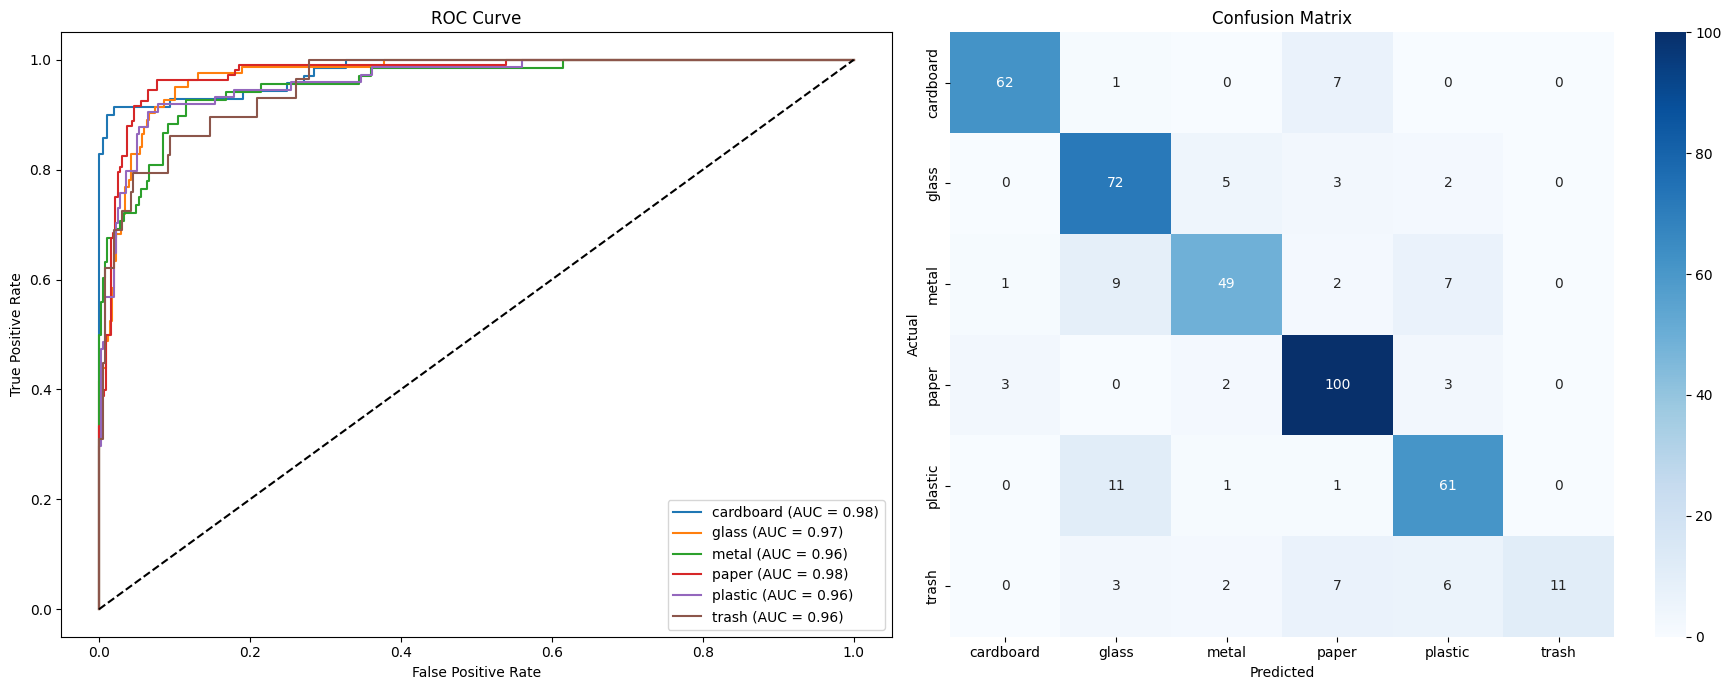

              precision    recall  f1-score   support

   cardboard       0.94      0.89      0.91        70
       glass       0.75      0.88      0.81        82
       metal       0.83      0.72      0.77        68
       paper       0.83      0.93      0.88       108
     plastic       0.77      0.82      0.80        74
       trash       1.00      0.38      0.55        29

    accuracy                           0.82       431
   macro avg       0.85      0.77      0.79       431
weighted avg       0.83      0.82      0.82       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 796ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 602ms/step - accuracy: 0.8694 - loss: 0.5315
Test Loss: 0.6667152047157288
Test Accuracy: 0.8074246048927307
F1 Score:  0.8039709861170201
Precision:  0.812175026263398
Recall:  0.8074245939675174
Accuracy:  0.8074245939675174


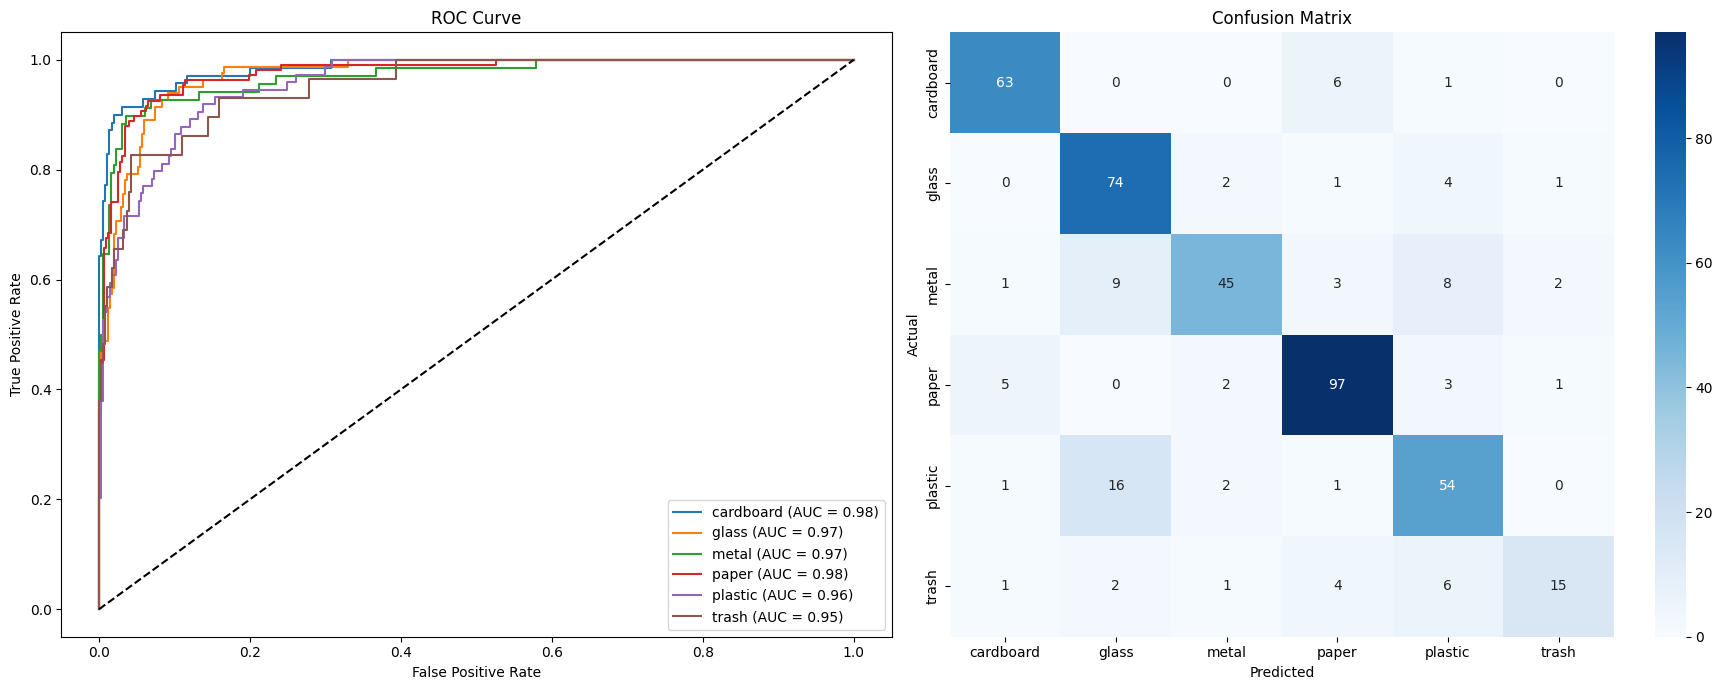

              precision    recall  f1-score   support

   cardboard       0.89      0.90      0.89        70
       glass       0.73      0.90      0.81        82
       metal       0.87      0.66      0.75        68
       paper       0.87      0.90      0.88       108
     plastic       0.71      0.73      0.72        74
       trash       0.79      0.52      0.62        29

    accuracy                           0.81       431
   macro avg       0.81      0.77      0.78       431
weighted avg       0.81      0.81      0.80       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 775ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 593ms/step - accuracy: 0.8642 - loss: 1.1085
Test Loss: 1.226881504058838
Test Accuracy: 0.8027842044830322
F1 Score:  0.7986015839580818
Precision:  0.8208544497434104
Recall:  0.802784222737819
Accuracy:  0.802784222737819


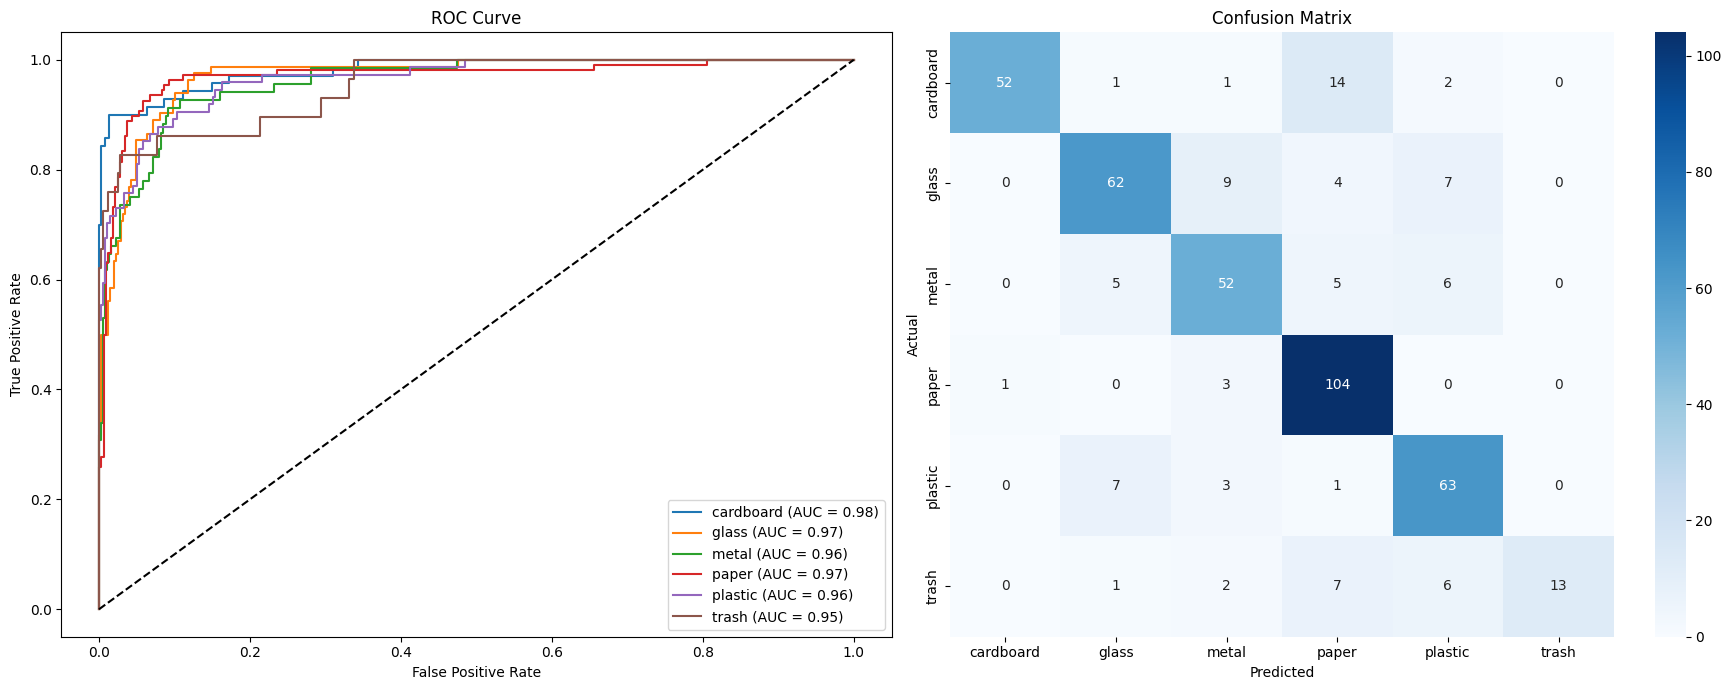

              precision    recall  f1-score   support

   cardboard       0.98      0.74      0.85        70
       glass       0.82      0.76      0.78        82
       metal       0.74      0.76      0.75        68
       paper       0.77      0.96      0.86       108
     plastic       0.75      0.85      0.80        74
       trash       1.00      0.45      0.62        29

    accuracy                           0.80       431
   macro avg       0.84      0.75      0.78       431
weighted avg       0.82      0.80      0.80       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 767ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 594ms/step - accuracy: 0.8798 - loss: 0.4214
Test Loss: 0.5662503242492676
Test Accuracy: 0.8167053461074829
F1 Score:  0.8131174168789902
Precision:  0.821995862710123
Recall:  0.8167053364269141
Accuracy:  0.8167053364269141


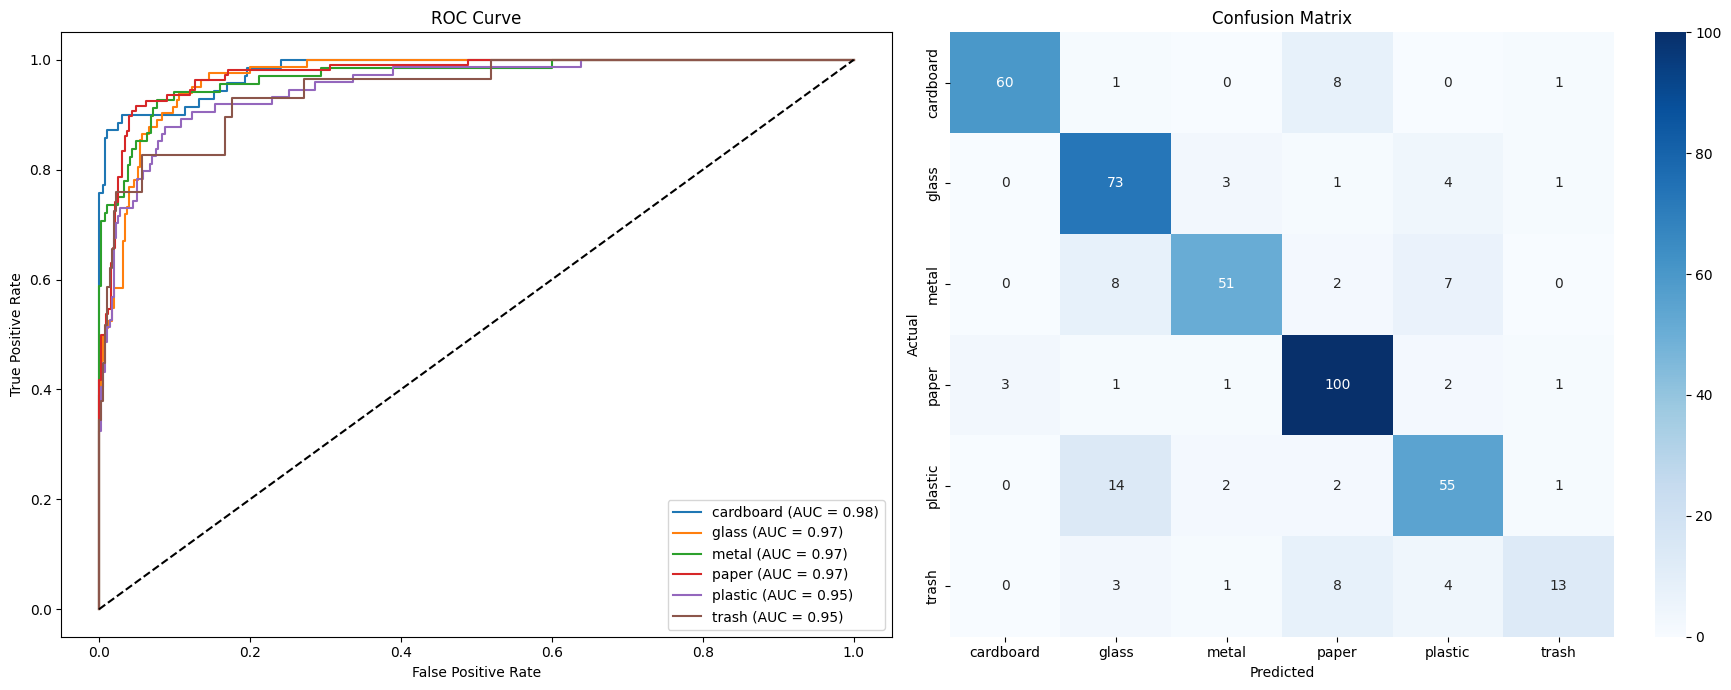

              precision    recall  f1-score   support

   cardboard       0.95      0.86      0.90        70
       glass       0.73      0.89      0.80        82
       metal       0.88      0.75      0.81        68
       paper       0.83      0.93      0.87       108
     plastic       0.76      0.74      0.75        74
       trash       0.76      0.45      0.57        29

    accuracy                           0.82       431
   macro avg       0.82      0.77      0.78       431
weighted avg       0.82      0.82      0.81       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 778ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 601ms/step - accuracy: 0.8597 - loss: 0.4695
Test Loss: 0.6039630770683289
Test Accuracy: 0.7958236932754517
F1 Score:  0.7927451881590697
Precision:  0.8085310965595286
Recall:  0.7958236658932715
Accuracy:  0.7958236658932715


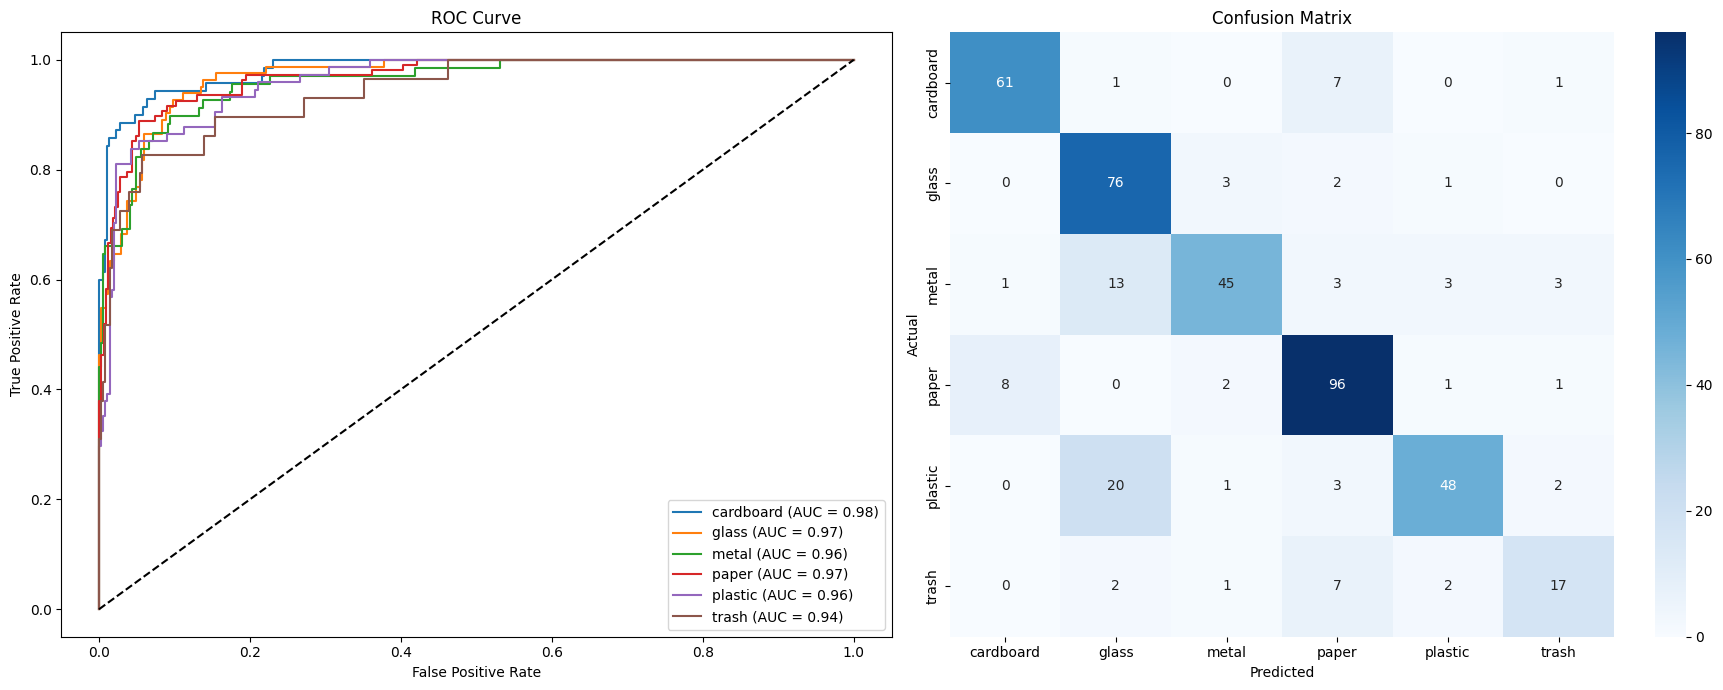

              precision    recall  f1-score   support

   cardboard       0.87      0.87      0.87        70
       glass       0.68      0.93      0.78        82
       metal       0.87      0.66      0.75        68
       paper       0.81      0.89      0.85       108
     plastic       0.87      0.65      0.74        74
       trash       0.71      0.59      0.64        29

    accuracy                           0.80       431
   macro avg       0.80      0.76      0.77       431
weighted avg       0.81      0.80      0.79       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 781ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 599ms/step - accuracy: 0.8581 - loss: 0.4679
Test Loss: 0.5952271223068237
Test Accuracy: 0.7981438636779785
F1 Score:  0.7932057118696344
Precision:  0.8168987709717409
Recall:  0.7981438515081206
Accuracy:  0.7981438515081206


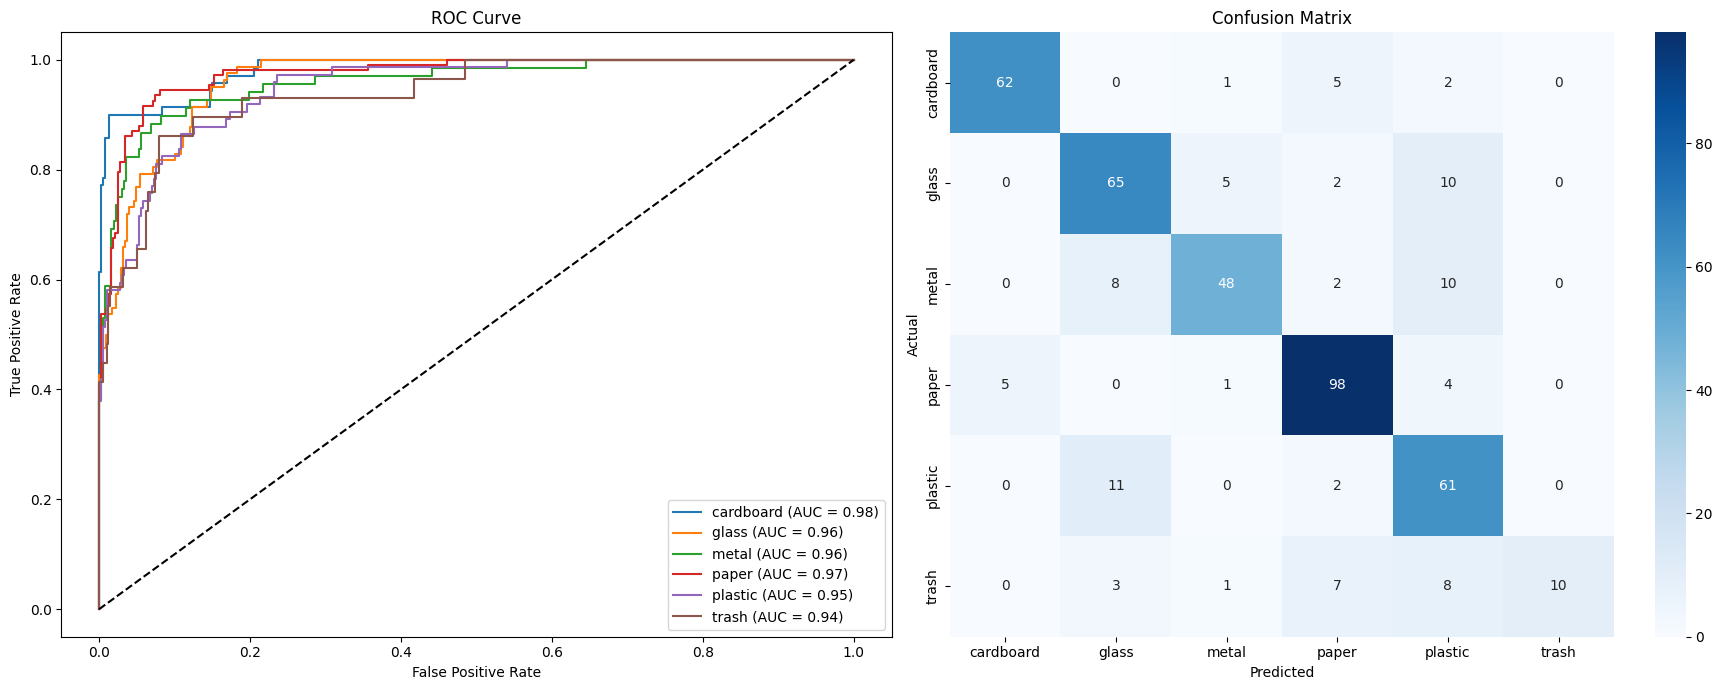

              precision    recall  f1-score   support

   cardboard       0.93      0.89      0.91        70
       glass       0.75      0.79      0.77        82
       metal       0.86      0.71      0.77        68
       paper       0.84      0.91      0.88       108
     plastic       0.64      0.82      0.72        74
       trash       1.00      0.34      0.51        29

    accuracy                           0.80       431
   macro avg       0.84      0.74      0.76       431
weighted avg       0.82      0.80      0.79       431



In [13]:
# Loading the model ADAM
from keras.models import load_model

print("\nLoading the model")
model = load_model('densenet121_model.h5')
model_l2 = load_model('densenet_model_l2.h5')
model_l1 = load_model('densenet_model_l1.h5')
model_dropout = load_model('densenet_model_dropout.h5')
model_es = load_model('densenet_model_es.h5')
model_de = load_model('densenet_model_de.h5')

for m in [model, model_l2, model_l1, model_dropout, model_es, model_de]:
    print("\nEvaluating the model")
    predictions = m.predict(X_test)
    loss, accuracy = m.evaluate(X_test, y_test)
    print('Test Loss:', loss)
    print('Test Accuracy:', accuracy)
    evaluate_model(predictions, y_test, classes_names)

In [ ]:
# Function to displaying random predictions from the dataset with their images and predictions

def display_random_predictions(X, y, predictions, classes_names, number_of_predictions=5):
    plt.figure(figsize=(15, 20))

    for class_name in classes_names:
        for i in range(number_of_predictions):
            index = np.random.choice(np.where(y == class_name)[0])
            plt.subplot(len(classes_names), number_of_predictions, number_of_predictions * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[index])
            plt.title("Actual: " + class_name + "\nPredicted: " + label_encoder.classes_[np.argmax(predictions[index])])
            plt.axis('off')
    
    plt.show()

display_random_predictions(X_test, y_test, predictions, classes_names)